In [1]:
from divination.nn import WordVectorEmbedding
from pensieve import ComputationGraph
from ravenclaw.wrangling import standardize_columns
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
cg = ComputationGraph()
cg.add(
    name='raw_sentiment', parents=[], 
    function=lambda: pd.read_csv('data/Raw_Sentiment_Output_10000_tweets.csv')
)
cg.add(
    name='clean_sentiment', parents=['raw_sentiment'], 
    function=lambda x: standardize_columns(x.drop(columns=x.columns[0]))
)
cg.add(
    name='tweet_texts', parents=[], 
    function=lambda: pd.read_csv('data/SentimentOutput_10000_tweets.csv')[['tweet_id', 'tweet_text']].drop_duplicates()
)
cg.add(
    name='training_and_test', parents=['tweet_texts'],
    function=lambda x: train_test_split(x, test_size=0.2)
)
cg.add(name='training', parents=['training_and_test'], function=lambda x: x[0])
cg.add(name='test', parents=['training_and_test'], function=lambda x: x[1])
for name in ['training', 'test']:  
    cg.add(
        name=f'{name}_tweet_sentiment_with_nan', parents=[name, 'clean_sentiment'],
        function=lambda x: x['clean_sentiment'].merge(right=x[name], on='tweet_id', how='inner')
    )
    cg.add(
        name=f'{name}_tweet_sentiment', parents=[f'{name}_tweet_sentiment_with_nan'],
        function=lambda x: x[x['sentiment_score'].notnull()]
    )
training_tweet = cg['training_tweet_sentiment']
training_tweet.head()

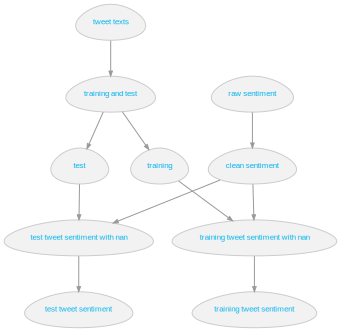

In [3]:
cg.render()

tweet_id  instance_id  iteration_id       worker_id   keyword  \
0  1011672986573819904       128294        382227  A2AQB56RXLT1MY  deltaair   
1  1011672986573819904       128294        382228  A2MSVA0U4214KP  deltaair   
2  1011672986573819904       128294        382229  A36KCXORL54MOC  deltaair   
3  1011672986573819904       128294        382230  A19KWRLD7P57VJ  deltaair   
4  1011672986573819904       128294        382231   AZCCA5QCX8R68  deltaair   

   keyword_irrelevant_flag  sentiment_score  \
0                    False              0.0   
1                    False              1.0   
2                    False              0.0   
3                    False              0.0   
4                    False              0.0   

                                          tweet_text  
0  The subject of............... Delta Air\nI adv...  
1  The subject of............... Delta Air\nI adv...  
2  The subject of............... Delta Air\nI adv...  
3  The subject of............... Delta Air\nI adv...  
4  The subject of............... Delta Air\nI adv...

In [5]:
wve = WordVectorEmbedding(text=training_tweet['tweet_text'], echo=2)

🕔 e:19.3s   r: 0.0s   ▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅ 100.00% WV 400000 word vectors
🕐 e: 1.0s   r: 0.0s   ▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅ 100.00% DV 16623 embeddings replaced
🕔 e:23.3s   r: 0.0s   ▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅▅ 100.00% WE word vector embedding ready!


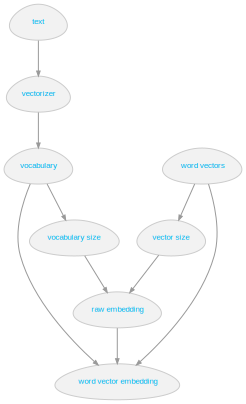

In [6]:
wve.graph.render()

In [7]:
wve.save(path='word_vector_embedding.pickle')

In [8]:
wve2 = WordVectorEmbedding.load(path='word_vector_embedding.pickle')

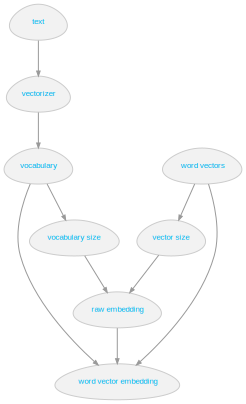

In [9]:
wve2.graph.render()

In [ ]:
from pensieve import ComputationGraph
g = ComputationGraph()
g.add(name='Timo', parents=[], function=lambda: 'T')
g.add(name='Turtle1', parents=['Timo'], function=lambda x: x+'1')

In [ ]:
g.render()

In [ ]:
with open(file='test', mode='wb') as output:
    pickle.dump(file=output, protocol=pickle.HIGHEST_PROTOCOL, obj=g)

In [ ]:
wve.graph.render()

In [ ]:
del wve.graph._nodes['text']

In [ ]:
import dill as pickle

In [ ]:
wve.graph.render()

In [ ]:
with open(file='test', mode='wb') as output:
    pickle.dump(file=output, protocol=pickle.HIGHEST_PROTOCOL, obj=wve.graph)

In [ ]:
wve2.graph.render()

In [ ]:
with open(file='word_vector_embedding.pickle', mode='wb') as output:
    pickle.dump(obj=wve, file=output, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
pickler.save(obj=wve, path='word_vector_embedding.pickle')

In [ ]:
from copy import deepcopy

In [ ]:
x = deepcopy(wve.graph)

In [ ]:
id(wve.graph['word_vector_embedding'].weight.data)

In [ ]:
id(wve.weight.data)